#### Q4: Company

In [1]:
#import pandas library for data analysis
import pandas as pd

In [2]:
#reading the csv file
df= pd.read_csv('company.csv')
df.head()

,gender,educ,dept,salary,jobtime,prevexp
0,2,12,1,21450,98,381
1,2,8,1,21900,98,190
2,2,12,1,21900,98,0
3,2,15,1,27900,98,115
4,2,12,1,24000,98,244


In [3]:
#check for null values
df.isnull().sum()

gender     0
educ       0
dept       0
salary     0
jobtime    0
prevexp    0
dtype: int64

In [4]:
#extract the male employees (gender=1) with a salary over 30000, 
# retaining the variables education and job time only

df[(df['gender'] == 1) & (df['salary'] > 30000)][['educ','jobtime']]

,educ,jobtime
216,15,98
217,16,98
218,15,98
219,15,98
220,15,98
...,...,...
467,15,65
468,19,65
469,19,64
470,12,64


In [5]:
# group the data frame by gender, 
# select the employees in the sales department (sales=3) and 
# compute their average salary

df[df['dept']== 3].groupby(by = 'gender')['salary'].mean().to_frame()

,salary
gender,
1,66243.243243
2,47213.500000


In [6]:
#select 50 employees at random, group them by department and 
# compute the average job time by department

df_50 = df.sample(n= 50)
df_50.groupby(by = 'dept')['jobtime'].mean().to_frame()

,jobtime
dept,
1,78.944444
2,73.000000
3,79.363636


In [7]:
#compute a new variable by adding the variables job time and previous experience
df['total_exp'] = df['jobtime'] + df['prevexp']

In [8]:
#select the top 10 employees by salary
df.nlargest(n = 10, columns= 'salary')

,gender,educ,dept,salary,jobtime,prevexp,total_exp
232,1,19,3,135000,96,199,295
235,1,19,3,110625,96,120,216
226,1,16,3,103750,97,70,167
409,1,16,3,103500,73,150,223
457,1,16,3,100000,66,128,194
280,1,19,3,97000,91,68,159
237,1,19,3,92000,96,175,271
283,1,19,3,91250,91,23,114
464,1,19,3,90625,65,18,83
448,1,18,3,86250,66,50,116


In [9]:
#group the data frame by department and gender, 
# then compute the average previous experience for each group
df.groupby(by = ['dept', 'gender'])['prevexp'].mean().to_frame()

prevexp
dept gender            
1    1        94.222930
     2        78.038835
2    1       298.111111
3    1        80.486486
     2        56.400000

In [10]:
#count the number of employees in each department, by gender
df.groupby(by= ['dept', 'gender']).size().unstack()

gender,1,2
dept,,
1,157.0,206.0
2,27.0,NaN
3,74.0,10.0


### Q18: Using the company.csv data frame, build a scatterplot chart that represents the relationship between job time and salary, for the female employees (gender=2).

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'salary of female employees')

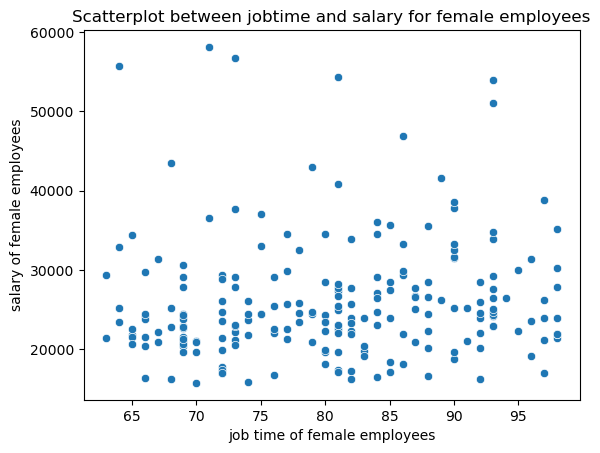

In [12]:
sns.scatterplot(x= 'jobtime', y='salary', data= df[df['gender']== 2])
plt.title('Scatterplot between jobtime and salary for female employees')
plt.xlabel('job time of female employees')
plt.ylabel('salary of female employees')